### Step-1 Import all libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

### Step-2 Import the data into pandas dataframe

In [2]:
url = "https://data.cityofchicago.org/resource/ajtu-isnz.json"
try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    df = pd.DataFrame(data)
except requests.exceptions.RequestException as e:
    print(e)

### Step-3 Understand the data

In [3]:
df.shape

(1000, 23)

In [4]:
df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
0,fa9222b000ab86e435b3209b51acd5a55d51e8ac,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,2026-01-01T00:00:00.000,2026-01-01T00:00:00.000,9,0.02,8,8,3.25,0,...,Cash,Sun Taxi,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
1,4278b3d1696d68d80af00fb6f89ad2c37618fad9,a700f56e643e08db0d6a189c37c6faa7fbf553b925b9b6...,2026-01-01T00:00:00.000,2026-01-01T00:15:00.000,720,2,27,29,9,0,...,Cash,Transit Administrative Center Inc,41.878914496,-87.70589713,"{'type': 'Point', 'coordinates': [-87.70589713...",41.860190019,-87.7172201,"{'type': 'Point', 'coordinates': [-87.7172201,...",NaN,NaN
2,6e087495752219d5b95e328dfdef8c7bcc1f304b,0d6436587c309cd68793fd45e1ca9b82b7d076cb80abd0...,2026-01-01T00:00:00.000,2026-01-01T00:00:00.000,300,0.7,8,8,7.32,0,...,Credit Card,Transit Administrative Center Inc,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
3,4177dfc1e7ba8d45db1f25890f08277fa3e45a1c,46c4778c3a32454511f96752c509c608955e293da45dbf...,2026-01-01T00:00:00.000,2026-01-01T00:15:00.000,960,2,8,33,10.75,0,...,No Charge,Transit Administrative Center Inc,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.857183858,-87.620334624,"{'type': 'Point', 'coordinates': [-87.62033462...",NaN,NaN
4,5778e05083eb2839745cba2b5b67834a76043107,17561b2493682865136063664df49b8a74d4c7e67e0ccf...,2026-01-01T00:00:00.000,2026-01-01T00:30:00.000,2034,18.06,76,8,47.5,10,...,Credit Card,Blue Ribbon Taxi Association,41.980264315,-87.913624596,"{'type': 'Point', 'coordinates': [-87.91362459...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   trip_id                     1000 non-null   object
 1   taxi_id                     1000 non-null   object
 2   trip_start_timestamp        1000 non-null   object
 3   trip_end_timestamp          1000 non-null   object
 4   trip_seconds                999 non-null    object
 5   trip_miles                  1000 non-null   object
 6   pickup_community_area       982 non-null    object
 7   dropoff_community_area      939 non-null    object
 8   fare                        1000 non-null   object
 9   tips                        1000 non-null   object
 10  tolls                       1000 non-null   object
 11  extras                      1000 non-null   object
 12  trip_total                  1000 non-null   object
 13  payment_type                1000 non-null   objec

In [6]:
df.describe()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
count,1000,1000,1000,1000,999,1000,982,939,1000,1000,...,1000,1000,982,982,982,939,939,939,303,297
unique,1000,557,9,17,696,524,53,56,458,190,...,7,19,76,76,76,84,84,84,23,28
top,fa9222b000ab86e435b3209b51acd5a55d51e8ac,008dda45db57cb6daa679a86ce8c8149ddc05446d545b1...,2025-12-31T22:00:00.000,2025-12-31T22:15:00.000,0,0,8,8,10.5,0,...,Mobile,Flash Cab,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",17031081500,17031839100
freq,1,6,172,144,19,98,360,328,94,586,...,377,199,212,212,212,180,180,180,42,44


### Step 4 Clean column names

In [7]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')

In [8]:
df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
0,fa9222b000ab86e435b3209b51acd5a55d51e8ac,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,2026-01-01T00:00:00.000,2026-01-01T00:00:00.000,9,0.02,8,8,3.25,0,...,Cash,Sun Taxi,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
1,4278b3d1696d68d80af00fb6f89ad2c37618fad9,a700f56e643e08db0d6a189c37c6faa7fbf553b925b9b6...,2026-01-01T00:00:00.000,2026-01-01T00:15:00.000,720,2,27,29,9,0,...,Cash,Transit Administrative Center Inc,41.878914496,-87.70589713,"{'type': 'Point', 'coordinates': [-87.70589713...",41.860190019,-87.7172201,"{'type': 'Point', 'coordinates': [-87.7172201,...",NaN,NaN
2,6e087495752219d5b95e328dfdef8c7bcc1f304b,0d6436587c309cd68793fd45e1ca9b82b7d076cb80abd0...,2026-01-01T00:00:00.000,2026-01-01T00:00:00.000,300,0.7,8,8,7.32,0,...,Credit Card,Transit Administrative Center Inc,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
3,4177dfc1e7ba8d45db1f25890f08277fa3e45a1c,46c4778c3a32454511f96752c509c608955e293da45dbf...,2026-01-01T00:00:00.000,2026-01-01T00:15:00.000,960,2,8,33,10.75,0,...,No Charge,Transit Administrative Center Inc,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",41.857183858,-87.620334624,"{'type': 'Point', 'coordinates': [-87.62033462...",NaN,NaN
4,5778e05083eb2839745cba2b5b67834a76043107,17561b2493682865136063664df49b8a74d4c7e67e0ccf...,2026-01-01T00:00:00.000,2026-01-01T00:30:00.000,2034,18.06,76,8,47.5,10,...,Credit Card,Blue Ribbon Taxi Association,41.980264315,-87.913624596,"{'type': 'Point', 'coordinates': [-87.91362459...",41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN


### Step-5 Remove duplicates

In [9]:
df2 = df.copy()

In [10]:
df2 = df2.drop(columns=['pickup_centroid_location','dropoff_centroid_location','dropoff_census_tract','pickup_census_tract'])

In [11]:
df2.duplicated().sum()

0

### Step-6 Missing Values

In [12]:
df2.isna().sum()

trip_id                        0
taxi_id                        0
trip_start_timestamp           0
trip_end_timestamp             0
trip_seconds                   1
trip_miles                     0
pickup_community_area         18
dropoff_community_area        61
fare                           0
tips                           0
tolls                          0
extras                         0
trip_total                     0
payment_type                   0
company                        0
pickup_centroid_latitude      18
pickup_centroid_longitude     18
dropoff_centroid_latitude     61
dropoff_centroid_longitude    61
dtype: int64

##### Here decided not to drop null values and filter them at the time of map visualizations

### Step-7 Fix data types of Columns

In [13]:
df2.dtypes

trip_id                       object
taxi_id                       object
trip_start_timestamp          object
trip_end_timestamp            object
trip_seconds                  object
trip_miles                    object
pickup_community_area         object
dropoff_community_area        object
fare                          object
tips                          object
tolls                         object
extras                        object
trip_total                    object
payment_type                  object
company                       object
pickup_centroid_latitude      object
pickup_centroid_longitude     object
dropoff_centroid_latitude     object
dropoff_centroid_longitude    object
dtype: object

In [14]:
string_cols = ['trip_id','taxi_id']
date_cols = ['trip_start_timestamp','trip_end_timestamp']
numeric_cols = ['trip_seconds',
                'trip_miles',
                'fare',
                'tips',
                'tolls',
                'trip_total',
                'extras',
                'pickup_centroid_latitude',
                'dropoff_centroid_latitude',
                'pickup_centroid_longitude',
                'dropoff_centroid_longitude']
category_cols = ['pickup_community_area','dropoff_community_area','payment_type','company']

In [15]:
df2[string_cols] = df2[string_cols].astype('string')
df2[date_cols] = df2[date_cols].apply(pd.to_datetime, errors='coerce')
df2[numeric_cols] = df2[numeric_cols].apply(pd.to_numeric)
df2[category_cols] = df2[category_cols].astype('category')

In [16]:
df2.dtypes

trip_id                       string[python]
taxi_id                       string[python]
trip_start_timestamp          datetime64[ns]
trip_end_timestamp            datetime64[ns]
trip_seconds                         float64
trip_miles                           float64
pickup_community_area               category
dropoff_community_area              category
fare                                 float64
tips                                 float64
tolls                                  int64
extras                               float64
trip_total                           float64
payment_type                        category
company                             category
pickup_centroid_latitude             float64
pickup_centroid_longitude            float64
dropoff_centroid_latitude            float64
dropoff_centroid_longitude           float64
dtype: object

In [17]:
df2.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,1000,1000,999.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,982.000000,982.000000,939.000000,939.000000
mean,2025-12-31 22:46:43.500000,2025-12-31 23:04:56.100000,971.045045,4.267840,18.28834,1.873390,0.015000,1.574220,22.081950,41.904302,-87.675624,41.894730,-87.648067
min,2025-12-31 22:00:00,2025-12-31 22:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.673820,-87.913625
25%,2025-12-31 22:15:00,2025-12-31 22:30:00,394.500000,0.727500,8.34750,0.000000,0.000000,0.000000,9.997500,41.880994,-87.663518,41.878866,-87.656306
50%,2025-12-31 22:45:00,2025-12-31 23:00:00,765.000000,1.700000,11.15000,0.000000,0.000000,0.000000,13.800000,41.899602,-87.633308,41.893216,-87.633308
75%,2025-12-31 23:15:00,2025-12-31 23:30:00,1216.000000,4.802500,21.90250,2.860000,0.000000,1.000000,26.250000,41.922686,-87.626215,41.901207,-87.625192
max,2026-01-01 00:00:00,2026-01-02 10:00:00,38177.000000,66.910000,500.00000,30.500000,3.000000,110.500000,500.000000,42.009623,-87.534903,42.009623,-87.551428
std,NaN,NaN,1462.254104,6.270685,22.49134,3.172296,0.186574,6.239456,26.139569,0.047086,0.091093,0.044427,0.045908


### Step-8 EDA

In [18]:
df2['company'].value_counts()

company
Flash Cab                            199
Transit Administrative Center Inc    159
Taxicab Insurance Agency Llc         129
City Service                         101
Sun Taxi                             100
5 Star Taxi                           79
Chicago Independents                  67
Blue Ribbon Taxi Association          35
Globe Taxi                            29
Choice Taxi Association Inc           28
Tac - Yellow Cab Association          27
Medallion Leasin                      25
Wolley Taxi                            8
Tac - Checker Cab Dispatch             4
Tac - American United Dispatch         3
Chicago City Taxi Association          3
Taxicab Insurance Agency  LLC          2
Chicago Taxicab                        1
312 Medallion Management Corp          1
Name: count, dtype: int64

In [19]:
df2['payment_type'].value_counts()

payment_type
Mobile         377
Credit Card    322
Cash           248
Prcard          41
Unknown          5
No Charge        4
Dispute          3
Name: count, dtype: int64

In [20]:
df2[['trip_miles','fare']].corr()

,trip_miles,fare
trip_miles,1.00000,0.57823
fare,0.57823,1.00000


In [21]:
df2[['trip_start_timestamp','fare']].corr()

,trip_start_timestamp,fare
trip_start_timestamp,1.000000,0.038181
fare,0.038181,1.000000


In [22]:
df2[['trip_seconds','fare']].corr()

,trip_seconds,fare
trip_seconds,1.00000,0.35285
fare,0.35285,1.00000


### Visualizations

In [23]:
df2.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,fa9222b000ab86e435b3209b51acd5a55d51e8ac,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,2026-01-01,2026-01-01 00:00:00,9.0,0.02,8,8,3.25,0.0,0,0.0,3.25,Cash,Sun Taxi,41.899602,-87.633308,41.899602,-87.633308
1,4278b3d1696d68d80af00fb6f89ad2c37618fad9,a700f56e643e08db0d6a189c37c6faa7fbf553b925b9b6...,2026-01-01,2026-01-01 00:15:00,720.0,2.00,27,29,9.00,0.0,0,0.0,9.00,Cash,Transit Administrative Center Inc,41.878914,-87.705897,41.860190,-87.717220
2,6e087495752219d5b95e328dfdef8c7bcc1f304b,0d6436587c309cd68793fd45e1ca9b82b7d076cb80abd0...,2026-01-01,2026-01-01 00:00:00,300.0,0.70,8,8,7.32,0.0,0,0.0,7.32,Credit Card,Transit Administrative Center Inc,41.899602,-87.633308,41.899602,-87.633308
3,4177dfc1e7ba8d45db1f25890f08277fa3e45a1c,46c4778c3a32454511f96752c509c608955e293da45dbf...,2026-01-01,2026-01-01 00:15:00,960.0,2.00,8,33,10.75,0.0,0,0.0,10.75,No Charge,Transit Administrative Center Inc,41.899602,-87.633308,41.857184,-87.620335
4,5778e05083eb2839745cba2b5b67834a76043107,17561b2493682865136063664df49b8a74d4c7e67e0ccf...,2026-01-01,2026-01-01 00:30:00,2034.0,18.06,76,8,47.50,10.0,0,4.0,62.00,Credit Card,Blue Ribbon Taxi Association,41.980264,-87.913625,41.899602,-87.633308


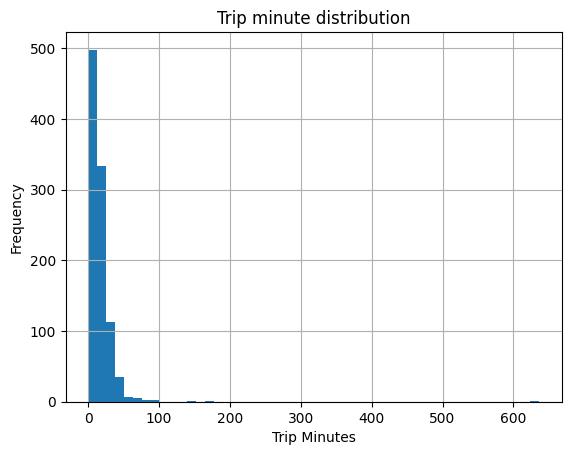

In [24]:
# trip_min = df2['trip_seconds']/60

plt.figure()
plt.hist(df2['trip_seconds']/60,bins=50)
plt.grid()
plt.title('Trip minute distribution')
plt.xlabel('Trip Minutes')
plt.ylabel('Frequency')
plt.show()

 This graph is left skewed and we can see there is outlier. We look into the outlier further using a box plot

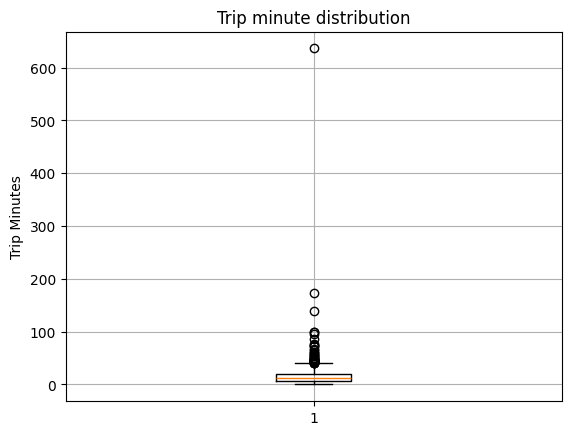

In [25]:
trip_minutes = df2['trip_seconds']/60
trip_minutes.describe(percentiles=[.25,.5,.75,.9,.95,.99])
plt.figure()
plt.boxplot(trip_minutes.dropna())
plt.grid()
plt.title('Trip minute distribution')
plt.ylabel('Trip Minutes')
plt.show()

Drop the outlier

In [26]:
df2 = df2[(df2['trip_seconds'] / 60) < 600]

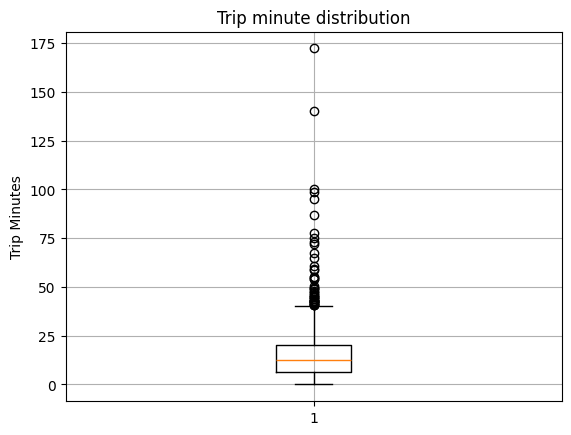

In [27]:
trip_minutes = df2['trip_seconds'] / 60
trip_minutes.describe(percentiles=[.25, .5, .75, .9, .95, .99])
plt.figure()
plt.boxplot(trip_minutes.dropna())
plt.grid()
plt.title('Trip minute distribution')
plt.ylabel('Trip Minutes')
plt.show()

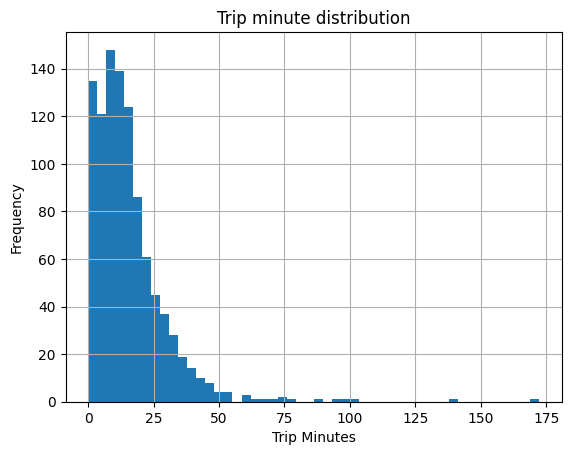

In [28]:
plt.hist(df2['trip_seconds']/60,bins=50)
plt.grid()
plt.title('Trip minute distribution')
plt.xlabel('Trip Minutes')
plt.ylabel('Frequency')
plt.show()

In [29]:
print(df2.columns)

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude'],
      dtype='object')


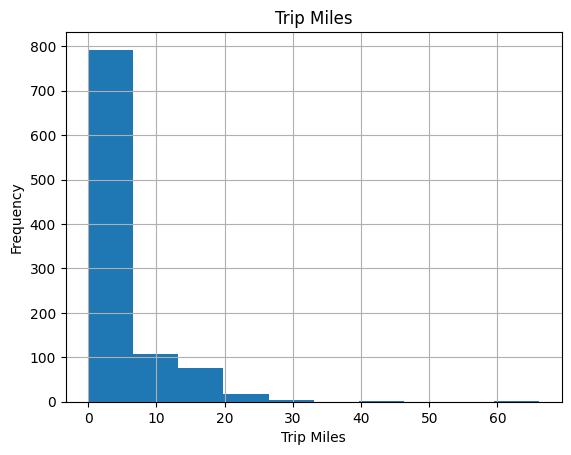

In [30]:
plt.hist(df2['trip_miles'])
plt.grid()
plt.title('Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.show()

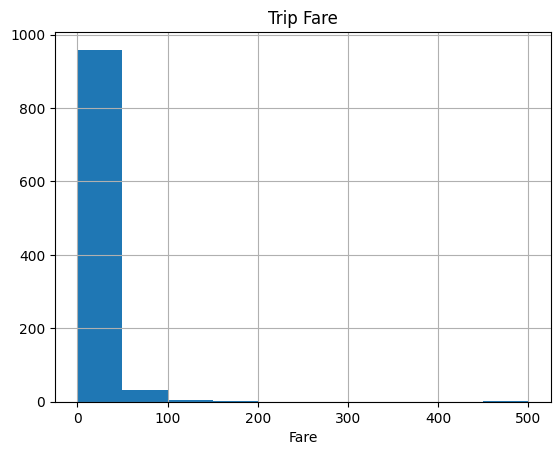

In [32]:
plt.hist(df2['fare'])
plt.grid()
plt.title('Trip Fare')
plt.xlabel('Fare')
plt.show()

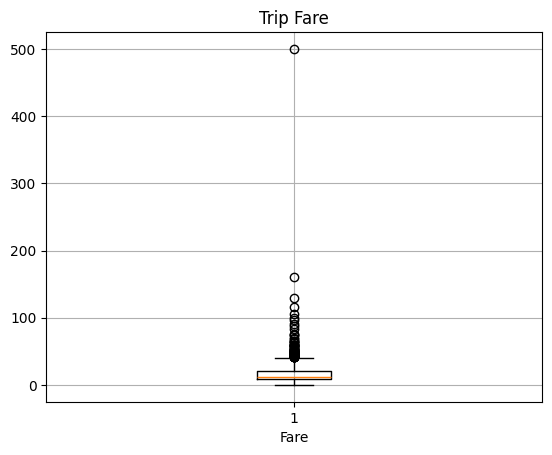

In [33]:
plt.boxplot(df2['fare'])
plt.grid()
plt.title('Trip Fare')
plt.xlabel('Fare')
plt.show()

In [34]:
df2 = df2[df2['fare']<500]

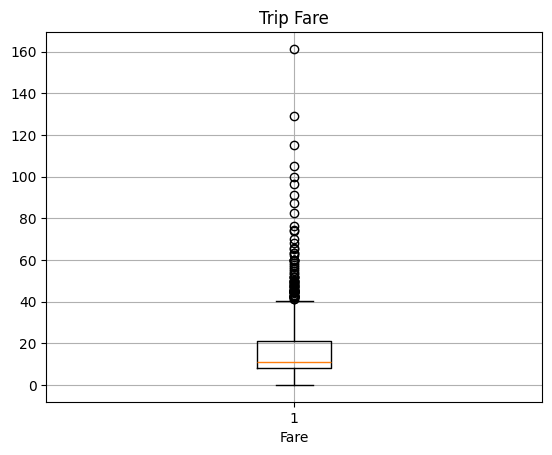

In [35]:
plt.boxplot(df2['fare'])
plt.grid()
plt.title('Trip Fare')
plt.xlabel('Fare')
plt.show()

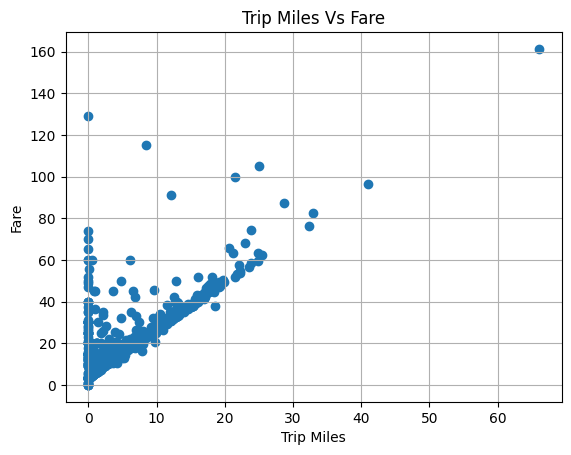

In [51]:
plt.scatter(df2['trip_miles'],df2['fare'])
plt.grid()
plt.title('Trip Miles Vs Fare')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
plt.show()

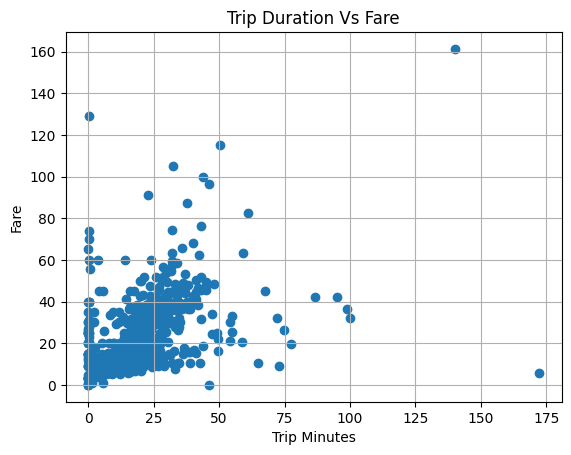

In [52]:
plt.scatter(df2['trip_seconds']/60,df2['fare'])
plt.grid()
plt.title('Trip Duration Vs Fare')
plt.xlabel('Trip Minutes')
plt.ylabel('Fare')
plt.show()

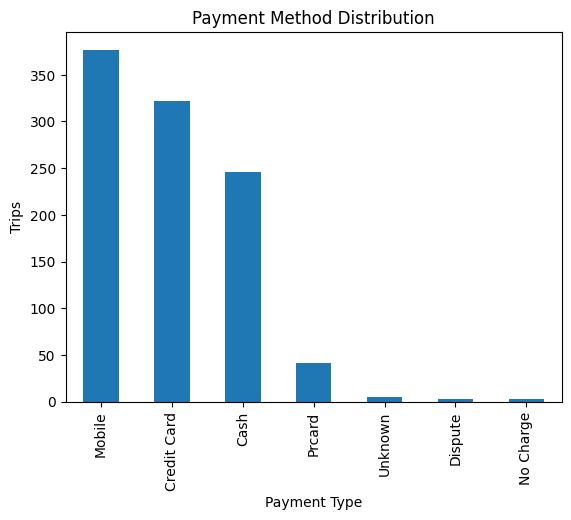

In [39]:
df2['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Trips')
plt.show()

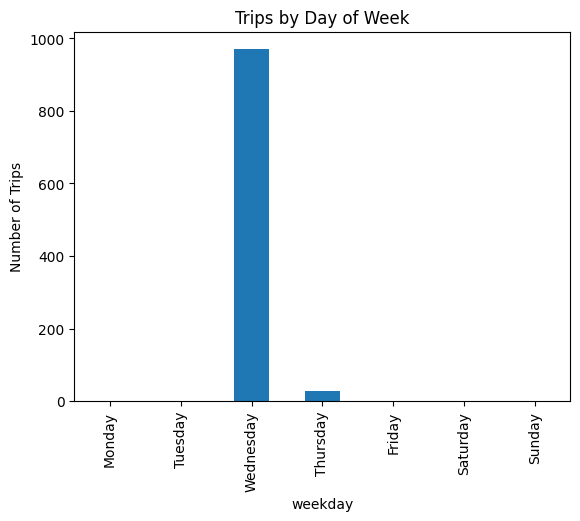

In [49]:
df2['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    fill_value=0
).plot(kind='bar')

plt.title('Trips by Day of Week')
plt.ylabel('Number of Trips')
plt.show()


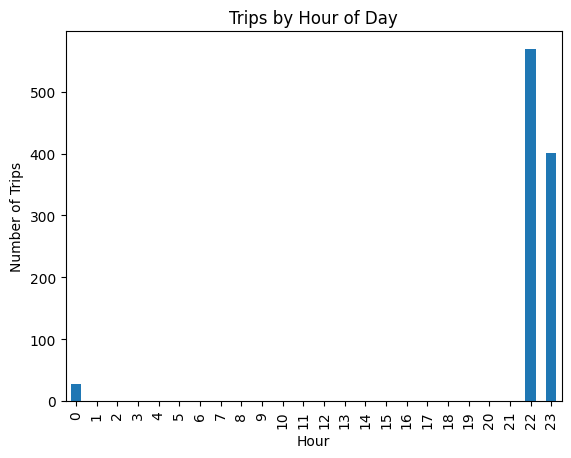

In [50]:
hour_counts = (
    df2.groupby('hour')
       .size()
       .reindex(range(24), fill_value=0)
)

hour_counts.plot(kind='bar')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()


In [53]:
print(df2.columns)

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'date', 'hour', 'weekday'],
      dtype='object')


In [54]:
df2.to_csv("dashboard.csv",index=False)